DATASET (CSV): https://drive.google.com/file/d/1WOAWpyH5FoDbVVgxe2apA9yw0sHuFzgW/view?usp=sharing

# Import thư viện

In [ ]:
!pip3 install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 5.5 MB/s 
     |████████████████████████████████| 965 kB 67.5 MB/s 
     |████████████████████████████████| 295 kB 52.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
##------------------------------------------------------------------------------
## Thư viện
##------------------------------------------------------------------------------
import imageio
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import plotly.express    as px
import warnings
warnings.filterwarnings('ignore')

from IPython.display         import Image
from sklearn                 import linear_model, svm, tree
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import BernoulliNB, GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from scipy.cluster          import hierarchy
from scipy.spatial.distance import cdist
from sklearn.cluster        import KMeans, AgglomerativeClustering
from sklearn.preprocessing  import MinMaxScaler, StandardScaler

import scipy.stats as stats

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Chỉ định thư mục làm việc hiện hành
import os
colab_dir = '/content/gdrive/My Drive/PROGRAMMING FOR DATA ANALYSIS'
my_dir    = '/Final Project'
path      = colab_dir + my_dir

# Chuyển thư mục hiện hành
%cd $path

# Tiền xử lý (cơ bản)
- xử lí missing values
- phân khoảng Age
- Flight distance -> bay đường dài, bay đường ngắn (tham khảo tài liệu ngoài)
- các biến định tính likert scale: 0 -> 3
- depart + arrive delay minutes: phân 2 khoảng 0-1x, >1x (x tự chọn, nên tham khảo tài liệu ngoài)

## Kiểm tra dữ liệu

In [ ]:
##------------------------------------------------------------------------------
## Dữ liệu
##------------------------------------------------------------------------------
data = pd.read_csv('Invistico_Airline.csv')
display(data.head(10), '\n')

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


'\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Xem thông tin chi tiết của các cột => Kiểm tra xem cột nào bị thiếu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
display(data.describe())

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Xử lí missing values:

In [ ]:
print('số gt bị thiếu:\n',len(data)-data.count())

số gt bị thiếu:
 satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [ ]:
# Nhận xét: Cột 'Arrival Delay in Minutes' có 393 dòng dữ liệu bị thiếu
# Vì những dữ liệu bị thiếu ít nên ta sẽ xóa những dòng đó

data = data.dropna(inplace = False)
data = data.reset_index()
data = data.drop(columns = 'index')
display(data)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## Phân thành 2 khoảng của cột Arrival Delay in Minutes:

In [ ]:
# kiểm tra dao động của thời gian delay khi khách hàng đánh giá là 'satisfied'

df = data[data['satisfaction']=='satisfied']
print('Khoảng thời gian hạ cánh bị dời ít nhất đối với các khách hàng hài lòng:', df['Arrival Delay in Minutes'].min())
print('Khoảng thời gian hạ cánh bị dời nhiều nhất đối với các khách hàng hài lòng:', df['Arrival Delay in Minutes'].max())

Khoảng thời gian hạ cánh bị dời ít nhất đối với các khách hàng hài lòng: 0.0
Khoảng thời gian hạ cánh bị dời nhiều nhất đối với các khách hàng hài lòng: 1280.0


In [ ]:
# kiểm tra dao động của thời gian delay khi khách hàng đánh giá là 'dissatisfied'

df1 = data[data['satisfaction']=='dissatisfied']
print('Khoảng thời gian hạ cánh bị dời ít nhất đối với các khách hàng không hài lòng:', df1['Arrival Delay in Minutes'].min())
print('Khoảng thời gian hạ cánh bị dời nhiều nhất đối với các khách hàng không hài lòng:', df1['Arrival Delay in Minutes'].max())

Khoảng thời gian hạ cánh bị dời ít nhất đối với các khách hàng không hài lòng: 0.0
Khoảng thời gian hạ cánh bị dời nhiều nhất đối với các khách hàng không hài lòng: 1584.0


In [ ]:
# Đếm xem đánh giá của KH 'satisfied' khi không bị delay thời gian hạ cánh

print('Sự hài lòng của KH khi chuyến bay hạ cánh không bị delay:',
      df[df['Arrival Delay in Minutes']==0].shape[0])

Sự hài lòng của KH khi chuyến bay hạ cánh không bị delay: 42683


In [ ]:
# Đếm xem đánh giá của KH 'dissatisfied' khi không bị delay thời gian hạ cánh

print('Sự không hài lòng của KH khi chuyến bay hạ cánh không bị delay:',
      df1[df1['Arrival Delay in Minutes']==0].shape[0])

Sự không hài lòng của KH khi chuyến bay hạ cánh không bị delay: 30070


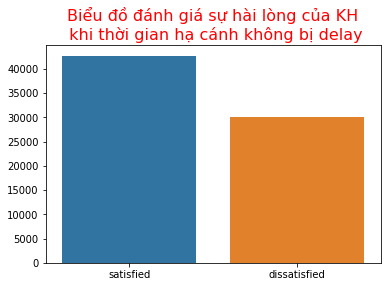

In [ ]:
# Biểu đồ thể hiển mức độ đánh giá của KH khi chuyến bay không bị delay

x = ['satisfied', 'dissatisfied']
y = [df[df['Arrival Delay in Minutes']==0].shape[0], df1[df1['Arrival Delay in Minutes']==0].shape[0]]
sbn.barplot(x, y)
plt.title('Biểu đồ đánh giá sự hài lòng của KH\n khi thời gian hạ cánh không bị delay', color = 'red', fontsize=16)
plt.show()

In [ ]:
# Từ biểu đồ trên, nhóm thấy được: nếu thời gian delay dưới 4 tiếng KH sẽ ít dissatisfied hơn
# Nếu nhóm chia thành 2 khoảng từ 0-240 (đơn vị phút) và lớn hơn 241
# Lọc xem trong cột 'Arrival Delay in Minutes' có bao nhiêu giá trị chính
unique_Data_Arri_Delay = data['Arrival Delay in Minutes'].unique().tolist()
unique_Data_Arri_Delay.sort()
print('Các giá trị có trong cột (Arrival Delay in Minutes):\n->', unique_Data_Arri_Delay, '\n---------------------\n')

# Tìm giá trị trung vị (median) để có thể chia đều số lượng các giá trị trong 2 khoảng bằng nhau
print('Giá trị trung vị của bộ dữ liệu:', np.median(unique_Data_Arri_Delay), '\n---------------------\n')


Các giá trị có trong cột (Arrival Delay in Minutes):
-> [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150

In [ ]:
# Từ đó thì ta sẽ chia thành 2 khoảng như sau:
series_bins1 = pd.cut(data['Arrival Delay in Minutes'], [0,241,1585], labels = ['0-240', '241-1584'], right = False)

# Thay thế giá trị của cột 'Arrival Delay in Minutes' thành giá trị vừa phân khoảng
data['Arrival Delay in Minutes'] = series_bins1
print('Ta có được bảng dữ liệu mới:')
display(data)

Ta có được bảng dữ liệu mới:


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0-240
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,241-1584
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0-240
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0-240
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0-240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0-240
129483,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,0-240
129484,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,0-240
129485,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,0-240


## Phân thành 2 khoảng của cột Departure Delay in Minutes:

In [ ]:
# kiểm tra dao động của thời gian delay khi khách hàng đánh giá là 'satisfied'

print('Khoảng thời gian khởi hành bị dời ít nhất đối với các khách hàng hài lòng:', df['Departure Delay in Minutes'].min())
print('Khoảng thời gian khởi hành bị dời nhiều nhất đối với các khách hàng hài lòng:', df['Departure Delay in Minutes'].max())

Khoảng thời gian khởi hành bị dời ít nhất đối với các khách hàng hài lòng: 0
Khoảng thời gian khởi hành bị dời nhiều nhất đối với các khách hàng hài lòng: 1305


In [ ]:
# kiểm tra dao động của thời gian delay khi khách hàng đánh giá là 'dissatisfied'

print('Khoảng thời gian khởi hành bị dời ít nhất đối với các khách hàng không hài lòng:', df1['Departure Delay in Minutes'].min())
print('Khoảng thời gian khởi hành bị dời nhiều nhất đối với các khách hàng không hài lòng:', df1['Departure Delay in Minutes'].max())

Khoảng thời gian khởi hành bị dời ít nhất đối với các khách hàng không hài lòng: 0
Khoảng thời gian khởi hành bị dời nhiều nhất đối với các khách hàng không hài lòng: 1592


In [ ]:
# Đếm xem đánh giá của KH 'satisfied' khi không bị delay thời gian cất cánh

print('Sự hài lòng của KH khi chuyến bay cất cánh không bị delay:',
      df[df['Departure Delay in Minutes']==0].shape[0])

Sự hài lòng của KH khi chuyến bay cất cánh không bị delay: 41908


In [ ]:
# Đếm xem đánh giá của KH 'dissatisfied' khi không bị delay thời gian cất cánh

print('Sự không hài lòng của KH khi chuyến bay cất cánh không bị delay:',
      df1[df1['Departure Delay in Minutes']==0].shape[0])

Sự không hài lòng của KH khi chuyến bay cất cánh không bị delay: 31301


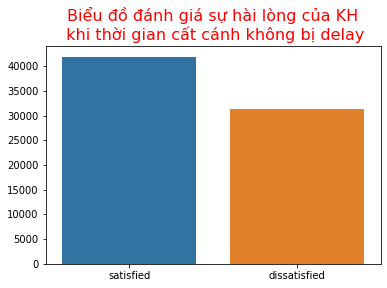

In [ ]:
# Biểu đồ thể hiển mức độ đánh giá của KH khi chuyến bay không bị delay

x = ['satisfied', 'dissatisfied']
y = [df[df['Departure Delay in Minutes']==0].shape[0], df1[df1['Departure Delay in Minutes']==0].shape[0]]
sbn.barplot(x, y)
plt.title('Biểu đồ đánh giá sự hài lòng của KH\n khi thời gian cất cánh không bị delay', color = 'red', fontsize=16)
plt.show()

In [ ]:
# Từ biểu đồ trên, nhóm thấy được: nếu thời gian delay dưới 4 tiếng KH sẽ ít dissatisfied hơn
# Nếu nhóm chia thành 2 khoảng từ 0-240 (đơn vị phút) và lớn hơn 241
# Lọc xem trong cột 'Arrival Delay in Minutes' có bao nhiêu giá trị chính
unique_Data_Departure_Delay = data['Departure Delay in Minutes'].unique().tolist()
unique_Data_Departure_Delay.sort()
print('Các giá trị có trong cột (Departure Delay in Minutes):\n->', unique_Data_Departure_Delay, '\n---------------------\n')

# Tìm giá trị trung vị (median) để có thể chia đều số lượng các giá trị trong 2 khoảng bằng nhau
print('Giá trị trung vị của bộ dữ liệu:', np.median(unique_Data_Departure_Delay), '\n---------------------\n')

# Từ đó thì ta sẽ chia thành 2 khoảng như sau:
series_bins2 = pd.cut(data['Departure Delay in Minutes'], [0,241,1593], labels = ['0-240', '241-1592'],  right = False)

Các giá trị có trong cột (Departure Delay in Minutes):
-> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 2

In [ ]:
# Thay thế giá trị của cột 'Departure Delay in Minutes' thành giá trị vừa phân khoảng
data['Departure Delay in Minutes'] = series_bins2
print('Ta có được bảng dữ liệu mới:')
display(data)

Ta có được bảng dữ liệu mới:


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0-240,0-240
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,241-1592,241-1584
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0-240,0-240
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0-240,0-240
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0-240,0-240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0-240,0-240
129483,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,0-240,0-240
129484,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,0-240,0-240
129485,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,0-240,0-240


## Phân thành các khoảng của cột Age:

In [ ]:
# Dùng hàm qcut để các khoảng sẽ tự chia đều
series_bins3 = pd.qcut(data['Age'], 4, labels = ["7-27", "28-40", "41-51", "52-85"])
data['Age'] = series_bins3
data.rename(columns = {'Age':'Age Group'},inplace = True)

print('Ta có được bảng dữ liệu mới:')
display(data)

Ta có được bảng dữ liệu mới:


,satisfaction,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0-240,0-240
1,satisfied,Male,Loyal Customer,41-51,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,241-1592,241-1584
2,satisfied,Female,Loyal Customer,7-27,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0-240,0-240
3,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0-240,0-240
4,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0-240,0-240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,28-40,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0-240,0-240
129483,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,0-240,0-240
129484,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,0-240,0-240
129485,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,0-240,0-240


## Xử lí thang đo Likert

Bộ dữ liệu đang quan sát có tổng cộng 13 biến thuộc kiểu dữ liệu định tính, sử dụng thang đo Likert với mức độ từ 1-5 (không hài lòng - rất hài lòng). Tuy nhiên, trong bộ dữ liệu có xuất hiện giá trị 0, đây không phải là giá trị thể hiện mức độ hài lòng của khách hàng về từng tiêu chí đánh giá mà là thể hiện khách hàng không có đánh giá tiêu chí đó (not rated). Nếu không xử lí giá trị 0 này thì khi tiến hành phân lớp, phân cụm sẽ gây ra hiểu lầm 0 cũng là 1 điểm đánh giá, và từ đó có thể làm sai lệch kết quả phân tích, khiến kết quả bị mâu thuẫn, phi logic.

Vì thế, ta sẽ xem 0 là dữ liệu bị thiếu. Nhóm quyết định sử dụng phương pháp thay thế dữ liệu bị thiếu này bằng 1 giá trị cụ thể, ở đây sẽ thay 0 thành 3. Nhóm chọn số 3 vì trong thang đo Likert, 3 nằm ở giữa, thể hiện thái độ bình thường, không yêu thích cũng không khó chịu, tương tự với việc khách hàng không quá coi trọng tiêu chí đánh giá đó và cảm thấy tiêu chí đó bình thường, không ảnh hưởng đến kết quả đánh giá chung về trải nghiệm bay của họ.

In [ ]:
columnsname = data.columns.tolist()

In [ ]:
for column in range (columnsname.index('Seat comfort'), len(columnsname)-2):
   data.loc[data[columnsname[column]] == 0, columnsname[column]] = 3
display(data)

,satisfaction,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,265,3,3,3,...,2,3,3,3,3,5,3,2,0-240,0-240
1,satisfied,Male,Loyal Customer,41-51,Personal Travel,Business,2464,3,3,3,...,2,3,4,4,4,2,3,2,241-1592,241-1584
2,satisfied,Female,Loyal Customer,7-27,Personal Travel,Eco,2138,3,3,3,...,2,2,3,3,4,4,4,2,0-240,0-240
3,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,623,3,3,3,...,3,1,1,3,1,4,1,3,0-240,0-240
4,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,354,3,3,3,...,4,2,2,3,2,4,2,5,0-240,0-240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,28-40,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0-240,0-240
129483,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,0-240,0-240
129484,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Eco,2320,3,3,3,...,2,4,4,3,4,2,3,2,0-240,0-240
129485,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,0-240,0-240


## phân loại biến Flight Distance

In [ ]:
len(data['Flight Distance'].unique())

5397

Biến Flight Distance thuộc kiểu dữ liệu liên tục, và trong bộ dữ liệu đang quan sát, biến Flight Distance có tổng cộng 5397 giá trị duy nhất. Vì thế, ta phải rời rạc hóa biến này để thuận lợi cho việc phân tích dữ liệu hơn. Sau khi tìm hiểu, trong lĩnh vực hàng không, độ dài đường bay được chia thành 3 loại: đường bay ngắn, đường bay trung bình và đường bay dài. Cụ thể:
*   Đường bay ngắn có độ dài dưới 600-800 nmi (hoặc dưới 1,1100 - 1,500 km)
*   Đường bay dài có độ dài từ 2,200 - 2,600 nmi (hoặc từ 4,100 - 4,800 km)
* Đường bay trung bình nằm giữa 800 - 2,200 nmi (từ 1,500 km đến 4,100 km)

Với thông tin trên, nhóm sẽ phân thành 3 khoảng cho biến Flight Distance:
* Short-haul: < 1500
* Medium-haul: 1500 <= x <= 4100
* Long-haul: > 4100



source: https://en.wikipedia.org/wiki/Flight_length

In [ ]:
bin_range_Flight_distance = [0,1500,4100,max(data['Flight Distance'])]
bin_names_Flight_distance = ['short-haul', 'medium-haul', 'long-haul']

In [ ]:
data['Flight Distance'] = pd.cut(np.array(data['Flight Distance']),
                                 bins=bin_range_Flight_distance,
                                 labels=bin_names_Flight_distance)
data

,satisfaction,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,short-haul,3,3,3,...,2,3,3,3,3,5,3,2,0-240,0-240
1,satisfied,Male,Loyal Customer,41-51,Personal Travel,Business,medium-haul,3,3,3,...,2,3,4,4,4,2,3,2,241-1592,241-1584
2,satisfied,Female,Loyal Customer,7-27,Personal Travel,Eco,medium-haul,3,3,3,...,2,2,3,3,4,4,4,2,0-240,0-240
3,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,short-haul,3,3,3,...,3,1,1,3,1,4,1,3,0-240,0-240
4,satisfied,Female,Loyal Customer,52-85,Personal Travel,Eco,short-haul,3,3,3,...,4,2,2,3,2,4,2,5,0-240,0-240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,Female,disloyal Customer,28-40,Personal Travel,Eco,medium-haul,5,5,5,...,2,2,3,3,4,4,4,2,0-240,0-240
129483,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Business,medium-haul,2,3,2,...,1,3,2,3,3,1,2,1,0-240,0-240
129484,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Eco,medium-haul,3,3,3,...,2,4,4,3,4,2,3,2,0-240,0-240
129485,dissatisfied,Male,disloyal Customer,52-85,Personal Travel,Eco,medium-haul,3,2,3,...,2,3,3,2,3,2,1,2,0-240,0-240


# Biểu đồ phân tích trực quan hóa dữ liệu

## ANH THƯ

In [ ]:
myfield1 = data['satisfaction']
myfield2 = data['Age Group']
cross = pd.crosstab(myfield1,myfield2)
barplot = cross.plot.bar(color=[(238/255,106/255,167/255), (205/255,96/255,144/255),(139/255,58/255,98/255),(205/255,92/255,92/255)],rot=0)
plt.title('Biểu đồ thể hiện số lượng khách hàng theo nhóm tuổi cho từng mức độ đánh giá')
plt.xlabel('Satisfaction')
plt.ylabel('Counts')

**Nhận xét**

Mức độ hài lòng "Satisfaction" được hiển thị trên trục hoành, đối với mỗi mức độ có 4 thanh tương ứng với nhóm tuổi. Biến "Age Group" (nhóm tuổi) mang tính liên tục nên màu sắc được sử dụng theo thang màu tuần tự.

Nhìn chung khách hàng có nhóm tuổi càng lớn sẽ có xu hướng đánh giá hài lòng đối với chuyến bay. Ngược lại khách hàng có nhóm tuổi càng trẻ có đánh giá không hài lòng nhiều hơn.

Đặc biệt độ tuổi từ 41-51 có sự chênh lệch mức độ đánh giá khá lớn, cụ thể số lượng đánh giá hài lòng lớn gần gấp 2 lần đánh giá không hài lòng. Trong khi đó độ tuổi 28-40 không có sự chênh lệch nhiều về mức độ đánh giá.

## NHUNG HUỲNH

Heat map: Biểu diễn mối tương quan giữa các tiêu chí đánh giá chuyến bay



In [ ]:
list1 = list(data.columns)

plt.subplots(figsize=(15,15))
sbn.heatmap(data[list1].corr(), annot = True, cmap = plt.cm.Reds)
plt.show()

**Nhận xét :**


*   Tiêu chí 'Checkin service' (Dịch vụ checkin) có mối tương quan kém nhất với tất cả các tiêu chí khác.
*   Tiêu chí 'Food and Drink' (Đồ ăn và nước uống) có mối tương quan mạnh nhất với tiêu chí 'Seat Comfort' (Chỗ ngồi thoải mái) (0.67)
*   Tiêu chí 'Ease of Online booking' và 'Online support' có mối tương quan mạnh mẽ nhất với tiêu chí 'Online boarding' (0.68 và 0.67)
*   Tiêu chí 'Inflight wifi service', 'Online support', 'Ease of Online booking', 'Baggage Handling', 'Cleanliness' và 'Online boarding' có mối tương quan khá chặt chẽ với nhau (~ 0.6)






## THY

In [ ]:
target = 'satisfaction'

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Biểu đồ thể hiện mức độ hài lòng ở các hạng vé',color = 'r')
x = 'Class'
y = target
sbn.countplot(x, hue = y, data = data)
plt.show()

**Nhận xét:**

Nhìn vào biểu đồ trên ta thấy được ở vé hạng Economy Plus có sự chênh lệch về mức độ hài lòng và không hài lòng của khách hàng tham gia chuyến bay không quá lớn, tương đối là như nhau (Khoảng 5000 khách). Ngược lại, ở vé hạng phổ thông (Economy Class) và vé hạng thương gia (Business Class) sự chênh lệch giữa hài lòng và không hài lòng có khác biệt lớn. Với vé hạng thương gia (Business Class) khách hàng đánh giá hài lòng rất cao (trên 40000 khách) khi tham gia các chuyến bay (gấp đôi số lượng đánh giá không hài lòng). Nhưng vé hạng phổ thông (Economy Class), khách hàng dường như không hài lòng với các dịch vụ, chưa cảm thấy thoải mái khi tham gia chuyến bay nên số lượng khách hàng đánh giá không hài chiếm số lượng rất lớn (khoảng 35000 khách).

## Thanh

In [ ]:
import plotly.express as px

fig = px.parallel_categories(data,
                             dimensions=['satisfaction', 'Flight Distance', 'Seat comfort'],
                             color = 'Seat comfort', color_continuous_scale="agsunset",
                             title='Biểu đồ thể hiện mối liên hệ giữa điểm tiêu chí chỗ ngồi thoải mái (Seat comfort) trong từng loại đường bay (Flight Distance) với sự hài lòng chung cho chuyến bay (satisfaction)',
                             width=1500, height=800)
fig.show()

**Nhận xét**

Việc khách hàng cảm thấy có thoải mái với chỗ ngồi trong từng loại đường bay có ảnh hưởng đến kết quả đánh giá độ hài lòng chung của khách hàng đối với cả chuyến bay:

*   Đối với chuyến bay đường ngắn:
  - Ở mức điểm 1-3, mức điểm thể hiện khách hàng không cảm thấy thoải mái với chỗ ngồi, sự thoải mái của chỗ ngồi không ảnh hưởng nhiều đến kết quả đánh giá tổng về chuyến bay. Cụ thể, tỉ lệ giữa việc khách hàng hài lòng với chuyến bay và không hài lòng với chuyến bay là xấp xỉ 50:50.
  - Trong khi đó, khi khách hàng cảm thấy chỗ ngồi thoải mái thì tỷ lệ khách hàng hài lòng với chuyến bay áp đảo so với sự không hài lòng:
      - ở mức điểm 4, tỉ lệ hài lòng : không hài lòng là khoảng 3:1;
      - ở mức điểm 5, hầu như không có khách hàng nào cảm thấy không hài lòng với chuyến bay (6000+ hài lòng : 30 không hài lòng)
  
*   Đối với chuyến bay đường trung bình:
  - Xu hướng cũng giống như chuyến bay đường ngắn, điểm số chỗ ngồi càng cao thì khách hàng thường sẽ hài lòng về chuyến bay

*   Đối với chuyến bay đường dài: việc đánh giá của khách hàng về sự hài lòng với chuyến bay phụ thuộc vào nhiều yếu tố khác, do vậy ở các điểm số 1-3 về chỗ ngồi, ta không nhìn thấy được sự liên hệ rõ ràng đến việc khách hàng hài lòng với chuyến bay; còn ở mức điểm 4-5, việc chỗ ngồi thoải mái một phần ảnh hưởng đến sự hài lòng của khách hàng với chuyến bay (hài lòng : không hài lòng ≈ 2:1)


In [ ]:
import plotly.express as px

fig = px.parallel_categories(data,
                             dimensions=['satisfaction', 'Flight Distance', 'Leg room service'],
                             color = 'Leg room service',
                             color_continuous_scale="agsunset",
                             title='Biểu đồ thể hiện mối liên hệ giữa điểm tiêu chí chỗ để chân (Leg room service) trong từng loại đường bay (Flight Distance) với sự hài lòng chung cho chuyến bay (satisfaction)',
                             width=1500, height=800
                )
fig.show()

**Nhận xét**

Việc khách hàng cảm thấy có thoải mái với chỗ để chân trong từng loại đường bay có ảnh hưởng đến kết quả đánh giá độ hài lòng chung của khách hàng đối với cả chuyến bay:

*   Đối với chuyến bay đường ngắn:
  - Ở mức điểm 1-3, mức điểm thể hiện khách hàng không thích dịch vụ về chỗ để chân, yếu tố chỗ để chân không ảnh hưởng nhiều đến kết quả đánh giá tổng về chuyến bay. Cụ thể, tỉ lệ giữa việc khách hàng hài lòng với chuyến bay và không hài lòng với chuyến bay là xấp xỉ 50:50.
  - Trong khi đó, khi khách hàng có thái độ tích cực với dịch vụ chỗ để chân thì tỷ lệ khách hàng hài lòng với chuyến bay áp đảo so với sự không hài lòng:
      - ở mức điểm 4, tỉ lệ hài lòng : không hài lòng là khoảng 3:1;
      - ở mức điểm 5, tỉ lệ hài lòng : không hài lòng là khoảng 8:1
  
*   Đối với chuyến bay đường trung bình:
  - Xu hướng cũng giống như chuyến bay đường ngắn, điểm số dịch vụ chỗ để chân càng cao thì khách hàng thường sẽ hài lòng về chuyến bay

*   Đối với chuyến bay đường dài: việc đánh giá của khách hàng về sự hài lòng với chuyến bay phụ thuộc vào nhiều yếu tố khác, do vậy ở các điểm số 1-3 về chỗ để chân, ta không nhìn thấy được sự liên hệ rõ ràng đến việc khách hàng hài lòng với chuyến bay; còn ở mức điểm 4-5, chất lượng dịch vụ chỗ để chân một phần ảnh hưởng đến sự hài lòng của khách hàng với chuyến bay (hài lòng : không hài lòng ≈ 2:1)

## Nhơn

In [ ]:
fig = px.sunburst(data,
                  path=["Type of Travel","satisfaction"],
                  title='Biểu đồ thể hiện sự hài lòng của hành khách đối với các loại hình du lịch'
                  )
fig.show()

**Nhận Xét :**

Có sự chênh lệch tỷ trọng giữa 2 loại hình Busines travel và Personal travel : 89,693 là Business travel và 40,187 là Personal travel.


*   Chênh lệch sự hài lòng đối với loại hình Personal Travel không lớn : 18,731 đánh giá hài lòng **bé hơn** 21,456 đánh giá không hài lòng  

*   Mặt khác: sự chênh lệch về mức độ hài lòng được thể hiện rõ ở loại hình Business travel với : 52,356 đánh giá hài lòng **lớn hơn** 37,337 đánh giá không hài lòng

## Tuyết Nhung

In [ ]:
# Chọn ra các cột có chứa thang đo từ 1 đến 5

lst_col = data.columns.tolist()
lst = lst_col[7:21]
lst

In [ ]:
df = pd.DataFrame()
df['x'] = ['1','2','3','4','5']
for temp in lst:
    d1 = data[data['satisfaction']=='satisfied'].groupby(temp).count()
    df[temp] = d1['satisfaction'].values
display(df)

In [ ]:
plt.figure(figsize=(16, 8))
colors = ['#663300','#666600','#FF00FF','#00CC99','#9966FF','#996600',
          '#FF0000','#FFCC00','#00CC00','#FF9900','#0066FF','#CC0066',
         '#663366','#003399']
for index, temp in enumerate(lst):
    plt.plot(df['x'], df[temp],marker='o',label=temp,color=colors[index])
plt.title('Biểu đồ thể hiện số lượng đánh giá trong khoảng [0-5] mà KH satisfied', color='r', fontsize=16)
plt.xlabel('Rating score')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

**Nhận xét:**
- Khi KH đánh giá hãng máy báy đó là 'satisfied' thì các dịch vụ của hãng bay đó phải được đánh giá trên 3 sao là chiến ưu thế.
- Có thể KH chọn 'satisfied' và có một vài đánh giá dịch vụ là 1 2 sao, nhưng nó không nhiều
- Số lượng đánh giá các dịch vụ 1-2 sao là gần như nhau và rất thấp

In [ ]:
df_ = pd.DataFrame()
df_['x'] = ['1','2','3','4','5']
for temp in lst:
    d1 = data[data['satisfaction']=='dissatisfied'].groupby(temp).count()
    df_[temp] = d1['satisfaction'].values
df_

In [ ]:
plt.figure(figsize=(16, 8))
colors = ['#663300','#666600','#FF00FF','#00CC99','#9966FF','#996600',
          '#FF0000','#FFCC00','#00CC00','#FF9900','#0066FF','#CC0066',
         '#663366','#003399']
for index, temp in enumerate(lst):
    plt.plot(df_['x'], df_[temp],marker='o',label=temp,color=colors[index])
plt.title('Biểu đồ thể hiện số lượng đánh giá trong khoảng [0-5] mà KH dissatisfied', color='r', fontsize=16)
plt.xlabel('Rating score')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

**Nhận xét:**
- Ngược lại với 'satisfied', thì 'dissatisfied' có số lượng KH đánh giá 5 sao ở các dịch vụ là thấp nhất
- Các dịch vụ được KH đánh giá là 'dissatisfied' thì sẽ được KH đánh giá nhiều nhất là 3 sao trở xuống

# Chuyển đổi dữ liệu phân loại thành dạng số

In [ ]:
mapping_satisfaction = {"satisfied": 1 , "dissatisfied": 0}
data['satisfaction'] = data['satisfaction'].map(mapping_satisfaction)

mapping_gender = {"Male": 1 , "Female": 0}
data['Gender'] = data['Gender'].map(mapping_gender)

mapping_customer_type = {"Loyal Customer": 1 , "disloyal Customer": 0}
data['Customer Type'] = data['Customer Type'].map(mapping_customer_type)

mapping_type_of_travel = {"Business travel": 1, "Personal Travel": 0}
data['Type of Travel'] = data['Type of Travel'].map(mapping_type_of_travel)

mapping_class = {"Business": 1 , "Eco Plus": 2 , "Eco": 3}
data['Class'] = data['Class'].map(mapping_class)

mapping_age_group = {"7-27": 1,  "28-40": 2, "41-51": 3 , "52-85": 4}
data['Age Group'] = data['Age Group'].map(mapping_age_group)

mapping_flight_distance = {"short-haul": 1 , "medium-haul": 2 , "long-haul": 3}
data['Flight Distance']  = data['Flight Distance'].map(mapping_flight_distance)

mapping_departure_delay_in_minutes ={"0-240": 1 , "241-1592": 2}
data['Departure Delay in Minutes']=data['Departure Delay in Minutes'].map(mapping_departure_delay_in_minutes)

mapping_arrival_delay_in_minutes={"0-240": 1 , "241-1584": 2}
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].map(mapping_arrival_delay_in_minutes)

In [ ]:
display(data)

,satisfaction,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,4,0,3,1,3,3,3,...,2,3,3,3,3,5,3,2,1,1
1,1,1,1,3,0,1,2,3,3,3,...,2,3,4,4,4,2,3,2,2,2
2,1,0,1,1,0,3,2,3,3,3,...,2,2,3,3,4,4,4,2,1,1
3,1,0,1,4,0,3,1,3,3,3,...,3,1,1,3,1,4,1,3,1,1
4,1,0,1,4,0,3,1,3,3,3,...,4,2,2,3,2,4,2,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1,0,0,2,0,3,2,5,5,5,...,2,2,3,3,4,4,4,2,1,1
129483,0,1,0,4,0,1,2,2,3,2,...,1,3,2,3,3,1,2,1,1,1
129484,0,1,0,4,0,3,2,3,3,3,...,2,4,4,3,4,2,3,2,1,1
129485,0,1,0,4,0,3,2,3,2,3,...,2,3,3,2,3,2,1,2,1,1


In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction                       129487 non-null  int64   
 1   Gender                             129487 non-null  int64   
 2   Customer Type                      129487 non-null  int64   
 3   Age Group                          129487 non-null  category
 4   Type of Travel                     129487 non-null  int64   
 5   Class                              129487 non-null  int64   
 6   Flight Distance                    129487 non-null  category
 7   Seat comfort                       129487 non-null  int64   
 8   Departure/Arrival time convenient  129487 non-null  int64   
 9   Food and drink                     129487 non-null  int64   
 10  Gate location                      129487 non-null  int64   
 11  Inflight wifi service     

None

In [ ]:
for i in columnsname:
  if type(data[i]) != 'int64':
    data[i] = data[i].astype('int64')

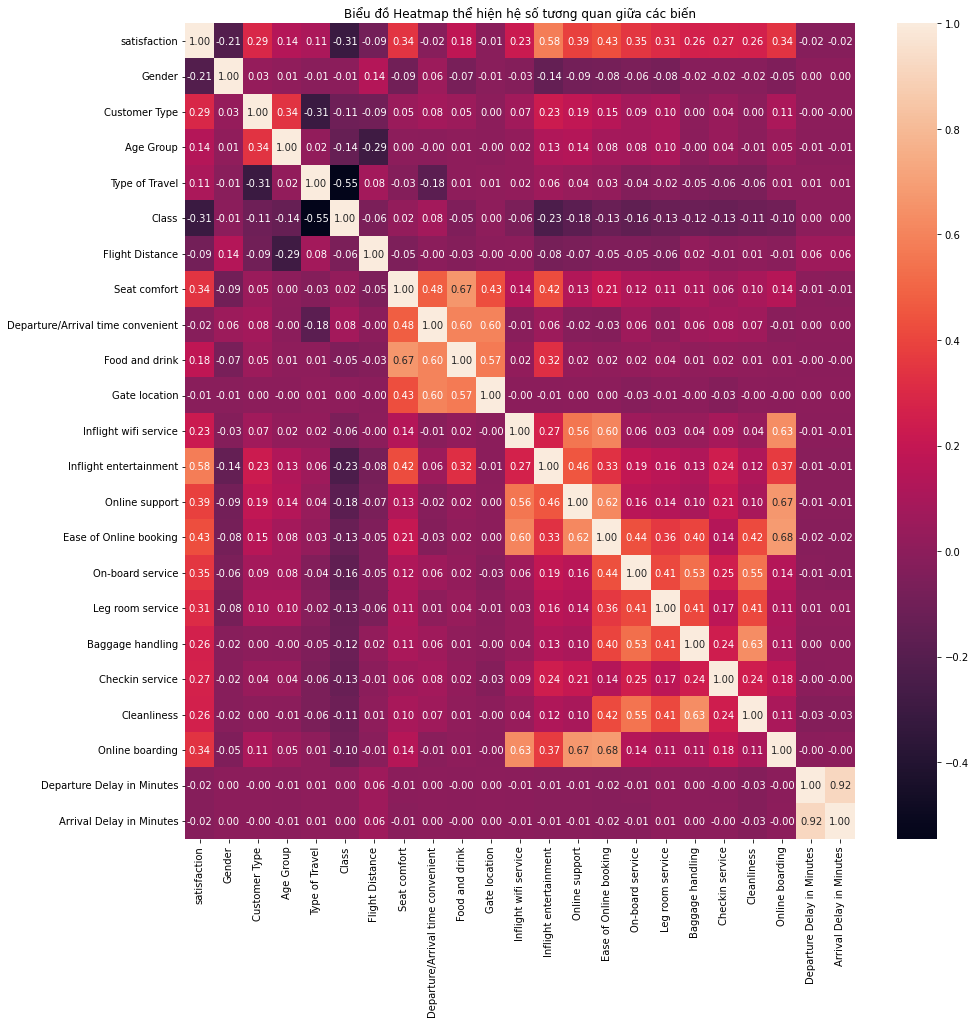

In [ ]:
list1 = list(data.columns)

plt.subplots(figsize=(15,15))
sbn.heatmap(data[list1].corr(), annot = True, fmt = ".2f")
plt.title('Biểu đồ Heatmap thể hiện hệ số tương quan giữa các biến')
plt.show()

# Phân lớp


## Train, test sets

In [ ]:
# Đặt biến target, feature
X = data.drop('satisfaction',axis=1).values
y = data['satisfaction'].values
# Tách dữ liệu thành tập train, tập test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 100)


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(103589, 22) (103589,)
(25898, 22) (25898,)


## Xây dựng mô hình

**Phân lớp bằng phương pháp K-NN Classification**

k=2 -> accuracy =89.15%

K=3 -> accuracy =89.95%

k=4 -> accuracy =89.70%

In [ ]:
k=3
model_knn=KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train,y_train)
KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yhat = model_knn.predict(X_test)
print(f'Độ chính xác ={accuracy_score(y_test,yhat)*100:.2f}%')
print(f'precision={precision_score(y_test, yhat)*100:.2f}%')
print(f'recall={recall_score(y_test, yhat)*100:.2f}%')
print(f'f1-score={f1_score(y_test, yhat)*100:.2f}%')

Độ chính xác =91.29%
precision=93.65%
recall=90.24%
f1-score=91.92%


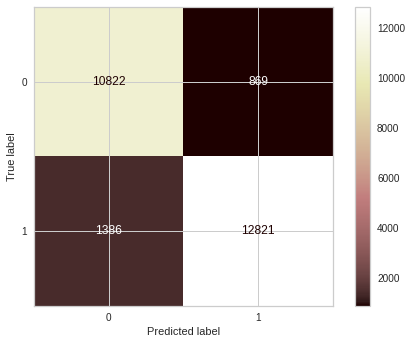

In [ ]:
#ma trận nhầm lẫn
plot_confusion_matrix(model_knn, X_test, y_test,cmap=plt.cm.pink)

**Phân lớp bằng phương pháp Decision Tree**

In [ ]:
model_dtree=DecisionTreeClassifier(criterion='entropy')
model_dtree.fit(X_train,y_train)
DecisionTreeClassifier(criterion='entropy')

DecisionTreeClassifier(criterion='entropy')

In [ ]:
yhat=model_dtree.predict(X_test)
print(f'Độ chính xác ={accuracy_score(y_test,yhat)*100:.2f}%')
print(f'precision={precision_score(y_test, yhat)*100:.2f}%')
print(f'recall={recall_score(y_test, yhat)*100:.2f}%')
print(f'f1-score={f1_score(y_test, yhat)*100:.2f}%')

Độ chính xác =92.20%
precision=92.76%
recall=93.04%
f1-score=92.90%


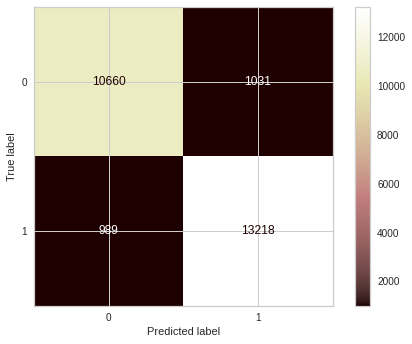

In [ ]:
#ma trận nhầm lẫn
plot_confusion_matrix(model_dtree, X_test, y_test,cmap=plt.cm.pink)

**Phân lớp bằng phương pháp Support Vector Machine (SVM)**

In [ ]:
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [ ]:
yhat = model_svm.predict(X_test)
print(f'Độ chính xác ={accuracy_score(y_test,yhat)*100:.2f}%')
print(f'precision={precision_score(y_test, yhat)*100:.2f}%')
print(f'recall={recall_score(y_test, yhat)*100:.2f}%')
print(f'f1-score={f1_score(y_test, yhat)*100:.2f}%')

Độ chính xác =92.29%
precision=93.64%
recall=92.21%
f1-score=92.92%


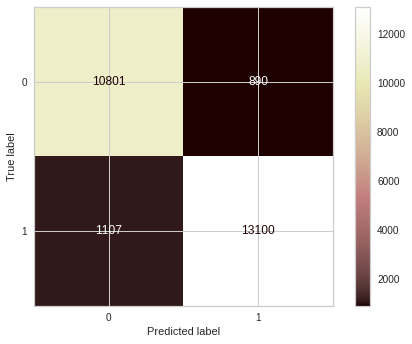

In [ ]:
#ma trận nhầm lẫn
plot_confusion_matrix(model_svm, X_test, y_test,cmap=plt.cm.pink)

**Phân lớp bằng phương pháp Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nbayes= GaussianNB()
model_nbayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
yhat = model_nbayes.predict(X_test)
print(f'Độ chính xác ={accuracy_score(y_test,yhat)*100:.2f}%')
print(f'precision={precision_score(y_test, yhat)*100:.2f}%')
print(f'recall={recall_score(y_test, yhat)*100:.2f}%')
print(f'f1-score={f1_score(y_test, yhat)*100:.2f}%')

Độ chính xác =81.85%
precision=82.12%
recall=85.54%
f1-score=83.80%


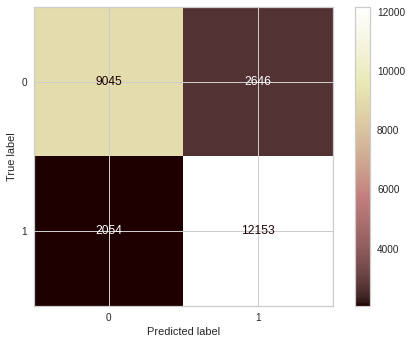

In [ ]:
#ma trận nhầm lẫn
plot_confusion_matrix(model_nbayes, X_test, y_test,cmap=plt.cm.pink)

## Đánh giá mô hình (Chọn phương pháp tốt nhất để dự báo)

Với phương pháp KNN Classification : ta chọn được số phân lớp là 3 có độ chính xác cao nhất ~91.29%.

Chỉ số trong một lần tính toán được :


1.   precision=93.65%
2.   recall=90.24%
3.   f1-score=91.92%


Với phương pháp Logistic Regression : kết quả phân lớp với độ chính xác ~84.95%.

Chỉ số trong một lần tính toán được :

1.   precision=85.61%
2.   recall=87.22%
3.   f1-score=86.41%


Với phương pháp Decision Tree : kết quả phân lớp với độ chính xác ~92.12%.

Chỉ số trong một lần tính toán được :

1.   precision=92.77%
2.   recall=92.88%
3.   f1-score=92.82%

Với phương pháp Support Vector Machine : kết quả phân lớp với Độ chính xác ~92.30%.

Chỉ số trong một lần tính toán được :

1.   precision=93.64%
2.   recall=92.22%
3.   f1-score=92.93%

Với phương pháp Naive Bayes GaussianNB  : kết quả phân lớp với Độ chính xác ~81.78%

Chỉ số trong một lần tính toán được :

1.   precision=81.99%
2.   recall=85.58%
3.   f1-score=83.75%



**Kết luận:**
Có 2 phương pháp phân lớp tối ưu là : Decision Tree và Support Vector Machine

## Áp dụng mô hình để dự báo

In [ ]:
#Chạy mô hình dự đoán 2 phương pháp
yhat_svm = model_svm.predict(X_test)
yhat_dtree = model_dtree.predict(X_test)

In [ ]:
#Chuyển đổi dạng số sang chữ của mảng yhat
def convert(a):
  if(a==1) :
    return 'Hài lòng'
  else :
    return 'Không hài lòng'

**Dự báo với mô hình Decision Tree**

In [ ]:
#bảng dự đoán hài lòng / không hài lòng theo mô hình phân lớp Decision Tree
for i in range(len(X_test)):
  print(X_test[i], ' -> ', convert(yhat_dtree[i]))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[0 1 2 1 1 2 3 2 2 2 2 3 3 3 3 3 3 1 3 3 1 1]  ->  Không hài lòng
[0 1 4 1 3 1 3 1 1 1 5 3 4 3 3 3 3 2 3 4 1 1]  ->  Không hài lòng
[0 1 1 1 1 1 3 3 3 3 3 3 3 3 4 1 3 2 4 3 1 1]  ->  Hài lòng
[0 1 4 0 3 1 3 5 3 4 2 5 4 5 5 3 5 3 5 2 1 1]  ->  Không hài lòng
[1 1 3 1 1 2 1 1 1 1 5 4 5 5 5 4 5 3 5 3 1 1]  ->  Hài lòng
[1 1 1 0 3 2 3 5 3 5 5 3 1 5 3 4 4 4 5 5 1 1]  ->  Hài lòng
[1 1 3 1 1 2 3 1 5 1 2 2 2 3 3 3 3 3 3 1 1 1]  ->  Không hài lòng
[1 1 2 1 1 2 1 5 1 1 3 5 1 4 4 4 4 4 4 5 1 1]  ->  Hài lòng
[1 0 2 1 1 2 3 3 3 3 2 3 2 2 5 3 5 3 5 2 1 1]  ->  Không hài lòng
[0 1 1 0 3 2 4 5 4 5 2 4 2 2 3 1 4 2 3 2 1 1]  ->  Không hài lòng
[0 1 4 1 1 1 2 2 2 2 5 5 5 4 4 4 4 4 4 4 1 1]  ->  Hài lòng
[0 1 4 1 1 2 2 1 3 3 2 3 3 2 2 2 2 4 2 4 1 1]  ->  Không hài lòng
[0 1 2 1 1 3 3 3 3 3 4 4 4 4 4 4 5 4 5 4 1 1]  ->  Hài lòng
[0 1 1 0 3 2 4 4 4 4 5 2 1 5 5 5 5 1 5 5 1 1]  ->  Hài lòng
[0 1 4 1 1 1 4 4 5 4 3 4 5 4 4 4 4 4 4 5 1 1]  ->  Hài lòng
[

**Dự báo với mô hình SVM**

In [ ]:
#bảng dự đoán hài lòng / không hài lòng theo mô hình phân lớp Support Vector Machine
for i in range(len(X_test)):
  print(X_test[i], ' -> ', convert(yhat_svm[i]))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[0 1 2 1 1 2 3 2 2 2 2 3 3 3 3 3 3 1 3 3 1 1]  ->  Không hài lòng
[0 1 4 1 3 1 3 1 1 1 5 3 4 3 3 3 3 2 3 4 1 1]  ->  Không hài lòng
[0 1 1 1 1 1 3 3 3 3 3 3 3 3 4 1 3 2 4 3 1 1]  ->  Không hài lòng
[0 1 4 0 3 1 3 5 3 4 2 5 4 5 5 3 5 3 5 2 1 1]  ->  Không hài lòng
[1 1 3 1 1 2 1 1 1 1 5 4 5 5 5 4 5 3 5 3 1 1]  ->  Hài lòng
[1 1 1 0 3 2 3 5 3 5 5 3 1 5 3 4 4 4 5 5 1 1]  ->  Không hài lòng
[1 1 3 1 1 2 3 1 5 1 2 2 2 3 3 3 3 3 3 1 1 1]  ->  Không hài lòng
[1 1 2 1 1 2 1 5 1 1 3 5 1 4 4 4 4 4 4 5 1 1]  ->  Hài lòng
[1 0 2 1 1 2 3 3 3 3 2 3 2 2 5 3 5 3 5 2 1 1]  ->  Không hài lòng
[0 1 1 0 3 2 4 5 4 5 2 4 2 2 3 1 4 2 3 2 1 1]  ->  Không hài lòng
[0 1 4 1 1 1 2 2 2 2 5 5 5 4 4 4 4 4 4 4 1 1]  ->  Hài lòng
[0 1 4 1 1 2 2 1 3 3 2 3 3 2 2 2 2 4 2 4 1 1]  ->  Không hài lòng
[0 1 2 1 1 3 3 3 3 3 4 4 4 4 4 4 5 4 5 4 1 1]  ->  Hài lòng
[0 1 1 0 3 2 4 4 4 4 5 2 1 5 5 5 5 1 5 5 1 1]  ->  Hài lòng
[0 1 4 1 1 1 4 4 5 4 3 4 5 4 4 4 4 4 4 5 1 1]  ->

**Ảnh hưởng của các biến độc lập tới biến phụ thuộc (satisfaction)**

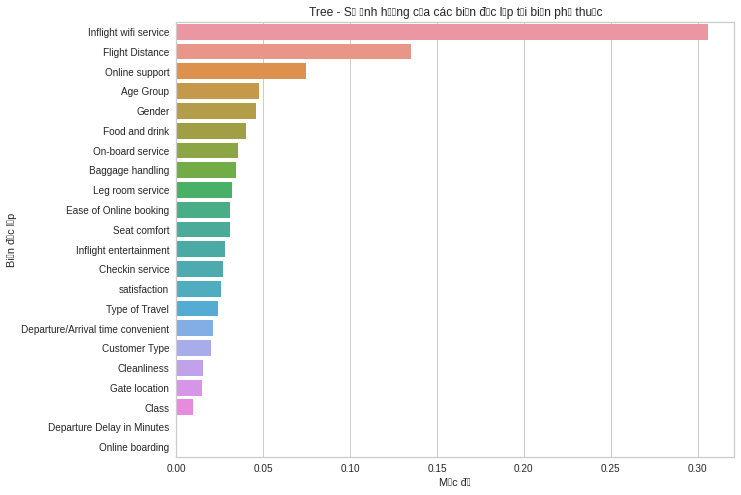

In [ ]:
feature_imp = pd.Series(model_dtree.feature_importances_, index = data.columns.values[0:22]).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sbn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Mức độ')
plt.ylabel('Biến độc lập')
plt.title('Tree - Sự ảnh hưởng của các biến độc lập tới biến phụ thuộc')
plt.show()

# Phân cụm

## kMeans

In [ ]:
data_cluster1 = data.drop(columns = ['satisfaction', 'Arrival Delay in Minutes'])
data_cluster1

,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0,1,4,0,3,1,3,3,3,2,...,4,2,3,3,3,3,5,3,2,1
1,1,1,3,0,1,2,3,3,3,3,...,2,2,3,4,4,4,2,3,2,2
2,0,1,1,0,3,2,3,3,3,3,...,3,2,2,3,3,4,4,4,2,1
3,0,1,4,0,3,1,3,3,3,3,...,4,3,1,1,3,1,4,1,3,1
4,0,1,4,0,3,1,3,3,3,3,...,3,4,2,2,3,2,4,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,0,2,0,3,2,5,5,5,3,...,5,2,2,3,3,4,4,4,2,1
129483,1,0,4,0,1,2,2,3,2,4,...,1,1,3,2,3,3,1,2,1,1
129484,1,0,4,0,3,2,3,3,3,3,...,2,2,4,4,3,4,2,3,2,1
129485,1,0,4,0,3,2,3,2,3,2,...,2,2,3,3,2,3,2,1,2,1


In [ ]:
k = 2
model_kMeans = KMeans(n_clusters = k)
model_kMeans.fit(data_cluster1)

## Các clusters
labels     = model_kMeans.labels_
clustering = pd.concat([data_cluster1, pd.Series(labels, name = 'cluster')], axis = 1)
print('Số phần tử của mỗi cluster:')
print(clustering.cluster.value_counts(), '\n')

## Các trọng tâm = các vectors trong không gian 4 chiều
print(f'Tọa độ của {k} trọng tâm:')
centroids  = model_kMeans.cluster_centers_
print(centroids)

Số phần tử của mỗi cluster:
1    77004
0    52483
Name: cluster, dtype: int64 

Tọa độ của 2 trọng tâm:
[[0.54983727 0.73595858 2.31046231 0.68487467 2.18844331 1.76132925
  2.53581013 3.07165832 2.81660037 2.95053387 2.37968444 2.73133363
  2.49753526 2.26154812 2.79962315 2.93721094 3.1524714  2.89387336
  3.16326298 2.31647666 1.00569079]
 [0.45349986 0.87210511 2.56317417 0.69478595 1.82099134 1.7077041
  3.23173394 3.19374626 3.10710108 3.01766174 3.84793232 3.94494841
  4.21815299 4.29952174 3.91977491 3.87816131 4.06622826 3.64589452
  4.07659917 4.06054896 1.0037039 ]]


In [ ]:
count = 0
for i in range (0,len(data)-1):
  if data.satisfaction[i] == clustering.cluster[i]:
    count += 1
print(f'Tỷ lệ dự đoán đúng khi đối chiếu với bộ dữ liệu gốc: {round(count/len(data),3)*100}%')

Tỷ lệ dự đoán đúng khi đối chiếu với bộ dữ liệu gốc: 76.4%


**Nhận xét**: Ở đây nhóm tính tỷ lệ phân cụm chính xác giữa kết quả sau khi phân cụm và biến target satisfaction ban đầu là 76,4%, một tỷ lệ có thể chấp nhận được

In [ ]:
from sklearn.metrics import silhouette_score

# Fit the KMeans model
#
model_kMeans.fit_predict(data_cluster1)
#
# Calculate Silhoutte Score
#
score = silhouette_score(data_cluster1,model_kMeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.172


**phương án 2**

In [ ]:
data_cluster2 = data[['Class', 'Gate location']]

In [ ]:
display(data_cluster2)

,Class,Gate location
0,3,2
1,1,3
2,3,3
3,3,3
4,3,3
...,...,...
129482,3,3
129483,1,4
129484,3,3
129485,3,2


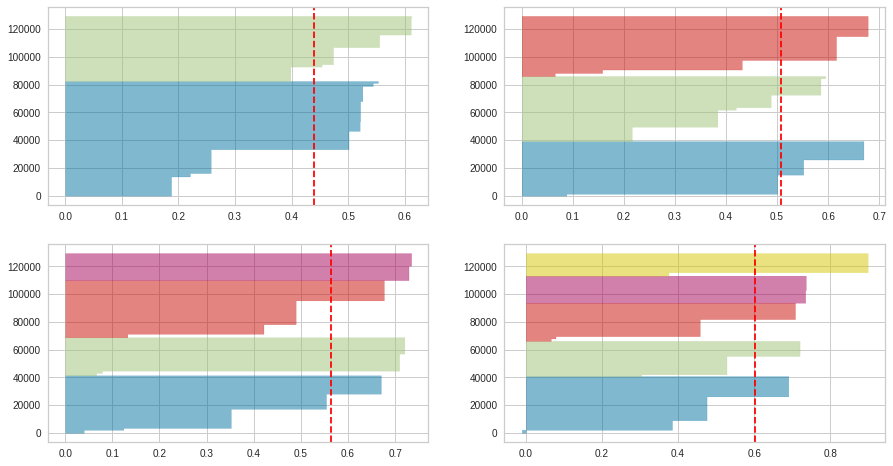

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    model_kMeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(model_kMeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_cluster2)

In [ ]:
from sklearn.metrics import silhouette_score

# Fit the KMeans model
#
model_kMeans.fit_predict(data_cluster2)
#
# Calculate Silhoutte Score
#
score = silhouette_score(data_cluster2,model_kMeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.602


In [ ]:
k = 5
model_kMeans = KMeans(n_clusters = k)
model_kMeans.fit(data_cluster2)

## Các clusters
labels     = model_kMeans.labels_
clustering1 = pd.concat([data_cluster2, pd.Series(labels, name = 'cluster')], axis = 1)
print('Số phần tử của mỗi cluster:')
print(clustering1.cluster.value_counts(), '\n')

## Các trọng tâm = các vectors trong không gian 4 chiều
print(f'Tọa độ của {k} trọng tâm:')
centroids  = model_kMeans.cluster_centers_
print(centroids)

Số phần tử của mỗi cluster:
2    40847
0    30295
1    25439
3    19470
4    13436
Name: cluster, dtype: int64 

Tọa độ của 5 trọng tâm:
[[1.13939594 2.53682126]
 [1.05251779 4.48083651]
 [2.94614048 3.74727642]
 [3.         1.53461736]
 [1.12064603 1.        ]]


In [ ]:
display(clustering1)

,Class,Gate location,cluster
0,3,2,3
1,1,3,0
2,3,3,2
3,3,3,2
4,3,3,2
...,...,...,...
129482,3,3,2
129483,1,4,1
129484,3,3,2
129485,3,2,3


**Biểu diễn kết quả phân cụm**

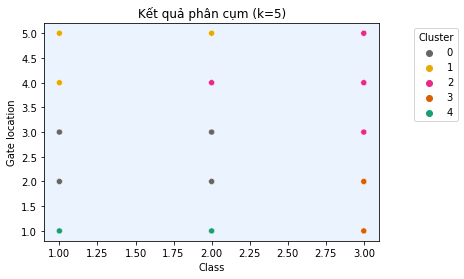

In [ ]:
ax = plt.axes()
ax.set_facecolor('#EBF3FF')


scatter = sbn.scatterplot(data = clustering1, x = 'Class', y = 'Gate location', hue = 'cluster', palette='Dark2_r')
plt.grid(False)
plt.legend(title="Cluster",
           loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Kết quả phân cụm (k=5)')
plt.show()

In [ ]:
from collections import Counter

# count the occurrences of each point
c = Counter(zip(clustering1['Class'], clustering1['Gate location'], clustering1['cluster']))
display(c)

Counter({(3, 2, 3): 10409,
         (1, 3, 0): 13788,
         (3, 3, 2): 17190,
         (3, 4, 2): 14590,
         (3, 1, 3): 9061,
         (1, 2, 0): 12284,
         (2, 2, 0): 1748,
         (2, 3, 0): 2475,
         (2, 4, 2): 2200,
         (1, 4, 1): 13207,
         (2, 1, 4): 1621,
         (1, 5, 1): 10896,
         (3, 5, 2): 6867,
         (2, 5, 1): 1336,
         (1, 1, 4): 11815})